In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import os
import random
import sys
from copy import deepcopy
from pathlib import Path

import networkx as nx
import numpy as np
import yaml
from matplotlib import pyplot as plt
from sparse._dok import DOK
from sparse._sparse_array import SparseArray

from babisteps import proccesing as proc
from babisteps import utils as ut
from babisteps.basemodels.immediateorder import (
    ImmediateOrder,
    ImmediateOrderModel,
    ImmediateOrderRequestPolar,
)
from typing import get_type_hints
from babisteps.basemodels.nodes import Entity, Relationship
from babisteps.tasks.immediateorder.utils import _get_generators,_get_list_relations, _get_relations_by_type
from babisteps.tasks.immediateorder.utils import relations_type_to_entities_dict

In [3]:
# yaml_path
yaml_common_path = './../babisteps/tasks/commons.yaml'
# Load the yaml file in yaml_test variable
with open(yaml_common_path, 'r') as file:
    yaml_commons = yaml.safe_load(file)

In [4]:
output_path = Path('/home/giskard/Documents/POKTscan/code/bAbI-steps/outputs')
# add output_path to yaml_commons 
yaml_commons['output_path'] = output_path

# ImmediateOrderRequestPolar

In [5]:
edge_qty = 8
relations_qty = 3
n_entities = 5
answer = "unknown"
verbosity = "INFO"
gen_kwargs = {}
path = os.path.join(os.getcwd())


total_relations = yaml_commons.get("relations")
relation_types_compatibility = yaml_commons.get("relation_types_compatibility")
entity_choice = random.choice(["actors", "locations", "objects", "events"])
print(entity_choice)
shape_str = (entity_choice,)
# Pick a random relation type
r_type_g = random.choice(
    list(get_type_hints(ImmediateOrderRequestPolar)["relation_type"].__args__)
)

r_name_by_r_type = _get_relations_by_type(total_relations)

actors


In [6]:
# Get relations compatible with the selected type
relations = _get_list_relations(
    r_type_g,
    r_name_by_r_type,
    relations_qty,
    total_relations,
    relation_types_compatibility,
)

In [7]:
# Get entities compatible with the selected relation type
entitie_type = random.choice(relations_type_to_entities_dict[r_type_g])
local_entities = yaml_commons.get(entitie_type)
entities = np.random.choice(
    local_entities, size=n_entities, replace=False
).tolist()
entities = [Entity(name=entity) for entity in entities]
# Create the model
model = ImmediateOrderModel(entities=entities, relations=relations)

topic = ImmediateOrderRequestPolar(
    answer=answer,
    relation_type=relations[0].relation_type,
    shape_str=shape_str,
)

In [8]:
generator = ImmediateOrder(
    model=deepcopy(model)._shuffle(),
    edge_qty=edge_qty,
    topic=topic,
    shape_str=shape_str,
    verbosity=verbosity,
    log_file=os.path.join(path, "logs.txt"),
    **gen_kwargs if gen_kwargs is not None else {},    

)

In [9]:
generator.generate()

Is the park east of the kitchen?


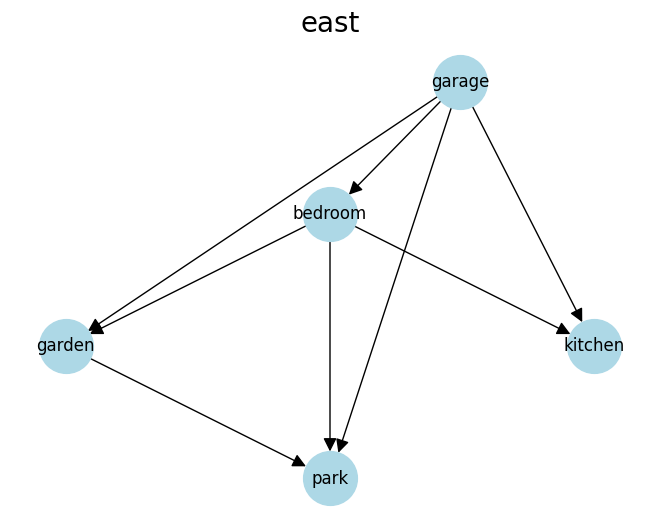

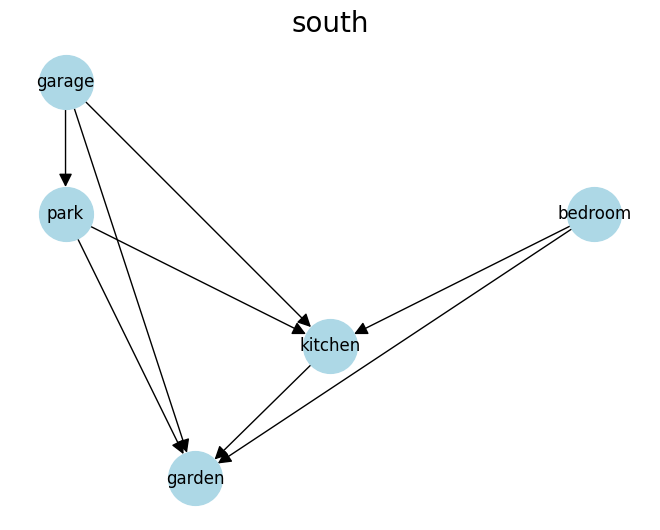

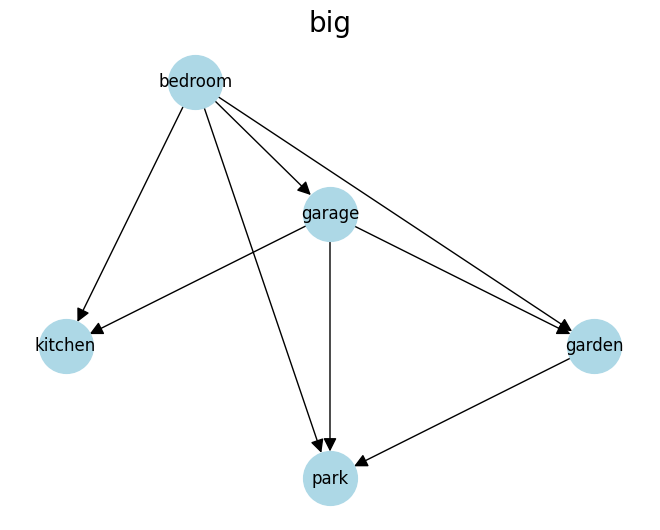

In [ ]:
print(generator.topic.get_question())
for GS, r in zip(generator.graphs, generator.model.relations):
    pos = nx.drawing.nx_agraph.graphviz_layout(GS.g, prog='dot')
    # Create a dictionary mapping nodes to their entity attributes
    node_labels = {node: data.get('entity').name for node, data in GS.g.nodes(data=True)}
    # Draw the graph with custom labels
    nx.draw(GS.g, pos, labels=node_labels, node_color='lightblue', node_size=1500, arrowsize=20)
    plt.title(r.name, fontsize=20)
    plt.show()

In [ ]:
json = generator.get_json()

In [ ]:
txt = generator.get_txt()